In [93]:
import numpy as np
import matplotlib.pyplot as plt
import importlib
import xarray as xr

import jemma_ODE_solvers2 as jde
import CAFE_tools as jcafe

plt.rcParams.update({'font.size': 18})
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

### Consider distributions

In [94]:
def histogram(data,bins,title='',xlabel='',ylabel='',ensemble_mean = np.nan,burgers_data = np.nan,
              burgers_bnds = np.nan, plot_normal = True,legend=True):
    plt.hist(data,bins=bins, color='#9DCBFE',density=True)
    plt.title(title,fontsize=16)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.plot(ensemble_mean,1/(np.std(data)*10*np.pi),c='k',linestyle = 'None', marker = 'o', markersize = 5, label = 'Ensemble mean')
    
    if burgers_data is not np.nan:
        plt.errorbar(burgers_data,1/(np.std(data)*10*np.pi),xerr=burgers_bnds,c='k',linestyle = 'None', marker = '^', markersize = 10, label = 'Burgers et al 2005 result')
    if legend:
        plt.legend()
    plt.tight_layout()
        
def real_eig(filename):
    A = xr.open_dataset(filename+'_A.nc').A
    eigenvalues = np.linalg.eig(A)[0]
    return np.real(eigenvalues)

def imag_eig(filename):
    A = xr.open_dataset(filename+'_A.nc').A
    eigenvalues = np.linalg.eig(A)[0]
    return np.imag(eigenvalues[...,0])

def period(filename):
    return 2*np.pi/imag_eig(filename)

## Full time period seasonal fits

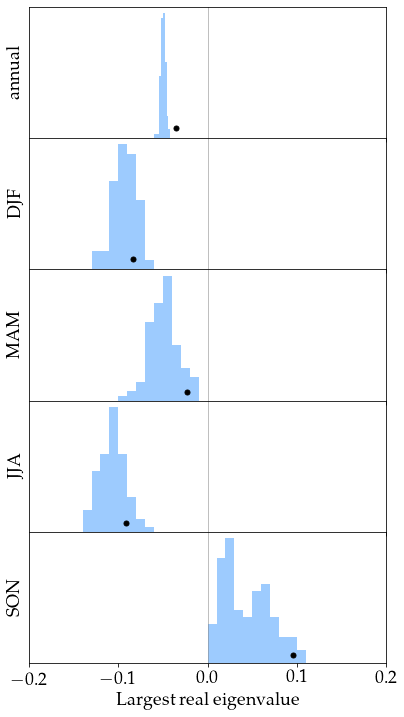

In [95]:
fig,ax = plt.subplots(5,1,figsize=(6,10),sharex=True)
ylabels = ('annual','DJF','MAM','JJA','SON')
for i,s in enumerate(('','_DJF','_MAM','_JJA','_SON')):
    plt.sca(ax[i])
    filename = 'fit_files/NINO34_SST__WHOLEPACIFIC_I20'+s
    data = np.max(real_eig(filename),2)
    years = xr.open_dataset(filename+'_A.nc').start_year
    bins = np.arange(-0.2,0.2,0.01)
    if i == 0:
        bins = np.arange(-0.2,0.2,0.002)
    histogram(data[0,1:],bins,title = '',
            ensemble_mean=[data[0,0]],
             legend=False,plot_normal=False
             )
          #burgers_data = 2*np.pi/np.imag(np.linalg.eig(Burgers_A)[0])[0]
    #ax[i].set_ylabel('Real '+s)
    plt.xlim(-0.2,0.2)
    ylim = plt.ylim()
    plt.plot((0,0),ylim,c='gray',alpha=0.5,linewidth=1)
    plt.ylim(ylim)
    plt.yticks([])
    plt.ylabel(ylabels[i])

    plt.xlabel('Largest real eigenvalue')
    

fig.subplots_adjust(hspace=0)
plt.savefig('paperplots/seasonal_real_hist_5.pdf')

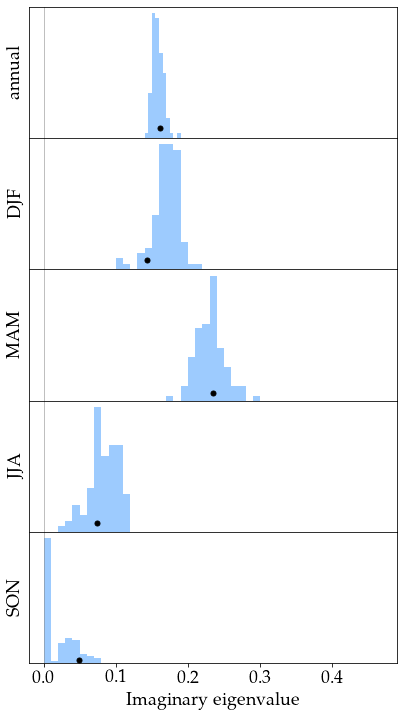

In [96]:
fig,ax = plt.subplots(5,1,figsize=(6,10),sharex = True)
ylabels = ('annual','DJF','MAM','JJA','SON')
for i,s in enumerate(('','_DJF','_MAM','_JJA','_SON')):
    plt.sca(ax[i])
    filename = 'fit_files/NINO34_SST__WHOLEPACIFIC_I20'+s
    data = imag_eig(filename)[:,1:]
    years = xr.open_dataset(filename+'_A.nc').start_year
    bins = np.arange(0,0.5,0.01)
    if i == 0:
        bins = np.arange(0,0.5,0.005)
    histogram(data[0,1:],bins,title = '',
            ensemble_mean=[data[0,0]],
             legend=False,plot_normal=False
             )
          #burgers_data = 2*np.pi/np.imag(np.linalg.eig(Burgers_A)[0])[0]
    #ax[i].set_ylabel('Real '+s)
    plt.xlim(-0.02,0.49)
    ylim = plt.ylim()
    plt.plot((0,0),ylim,c='gray',alpha=0.5,linewidth=1)
    plt.ylim(ylim)
    plt.yticks([])
    plt.ylabel(ylabels[i])

    plt.xlabel('Imaginary eigenvalue')
    

fig.subplots_adjust(hspace=0)
plt.savefig('paperplots/seasonal_imag_hist_5.pdf')

# Changes over time


In [97]:
def IQR_timeseries(xdata,ydata,ydata2=None,ax=None):
    p25 = np.percentile(ydata,25,axis=1)
    p50 = np.percentile(ydata,50,axis=1)
    p75 = np.percentile(ydata,75,axis=1)
    
    if ax is None:
        plt.plot(xdata,p50,'k')
        plt.fill_between(xdata,p25,p75,color='#9DCBFE')
    else:
        ax.plot(xdata,p50,'k')
        ax.fill_between(xdata,p25,p75,color='#9DCBFE')
        
    if ydata2 is not None:
        IQR_timeseries(xdata,ydata2,ax=ax)

# Seasonal, changing over time


<Figure size 864x360 with 0 Axes>

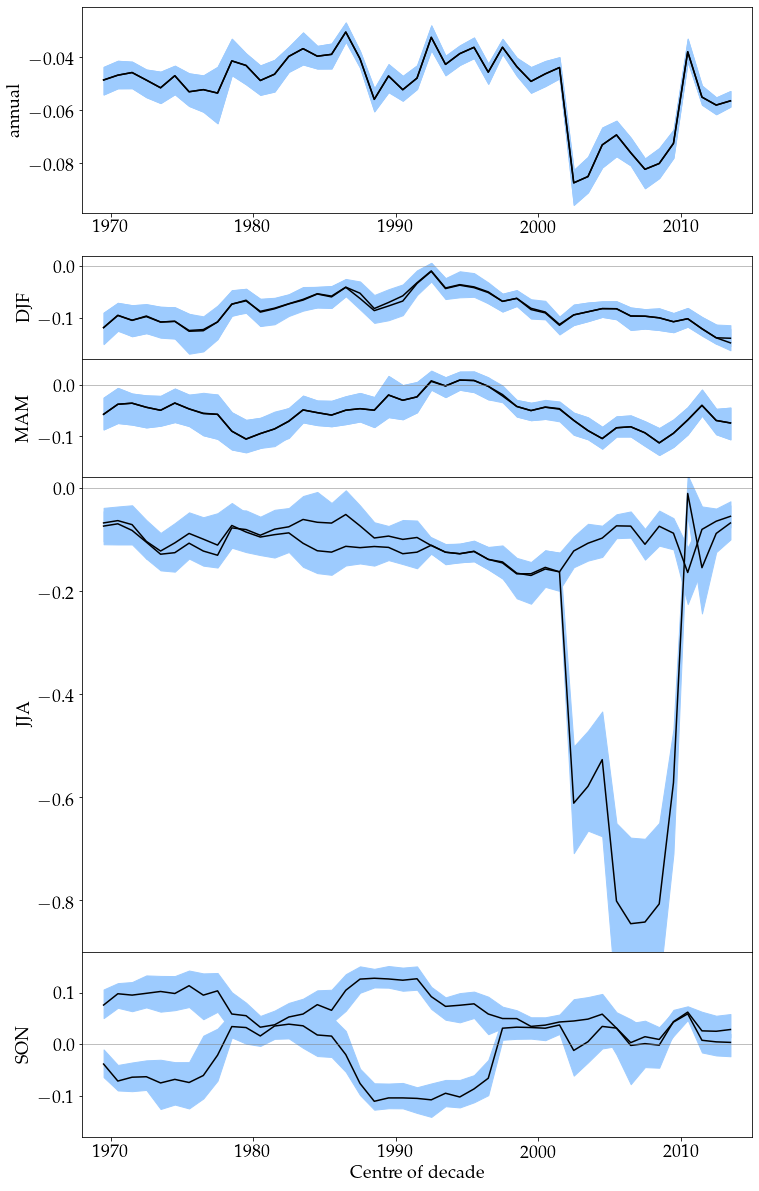

In [98]:
plt.figure(figsize=(12,5))
ylims = np.array((
                 (-0.4,0),
                 (-0.18,0.02),
                 (-0.18,0.05),
                 (-0.9,0.02),
                 (-0.18,0.18),
                ))
totaly = np.sum(ylims[:,1]-ylims[:,0])
fig,ax = plt.subplots(5,1,figsize=(12,20),gridspec_kw={'height_ratios': ylims[:,1]-ylims[:,0]})
for i,s in enumerate(('annual','DJF','MAM','JJA','SON')):
    if s == 'annual':
        filename = 'fit_files/NINO34_SST__WHOLEPACIFIC_I20_sliding_decade_each_ensemble'
    else:
        filename = 'fit_files/NINO34_SST__WHOLEPACIFIC_I20_10y_'+s
    data = real_eig(filename)[:,1:,:]
    years = xr.open_dataset(filename+'_A.nc').start_year
    
    IQR_timeseries(years+4.5,data[...,0],data[...,1],ax=ax[i])
    ax[i].set_ylabel(s)

    ax[i].set_ylim(ylims[i])
    
    ax[i].plot((1968,2015),(0,0),linewidth=1,color='gray',alpha=0.5)
    ax[i].set_xlim(1968,2015)

ax[0].set_ylim(-0.099,-0.021)
plt.xlabel('Centre of decade')
fig.subplots_adjust(hspace=0)
box = ax[0].get_position()
box.y0 = box.y0 + 0.03
box.y1 = box.y1 + 0.03
ax[0].set_position(box)
plt.savefig('paperplots/decade_seasonal_real_samescale_5.pdf')

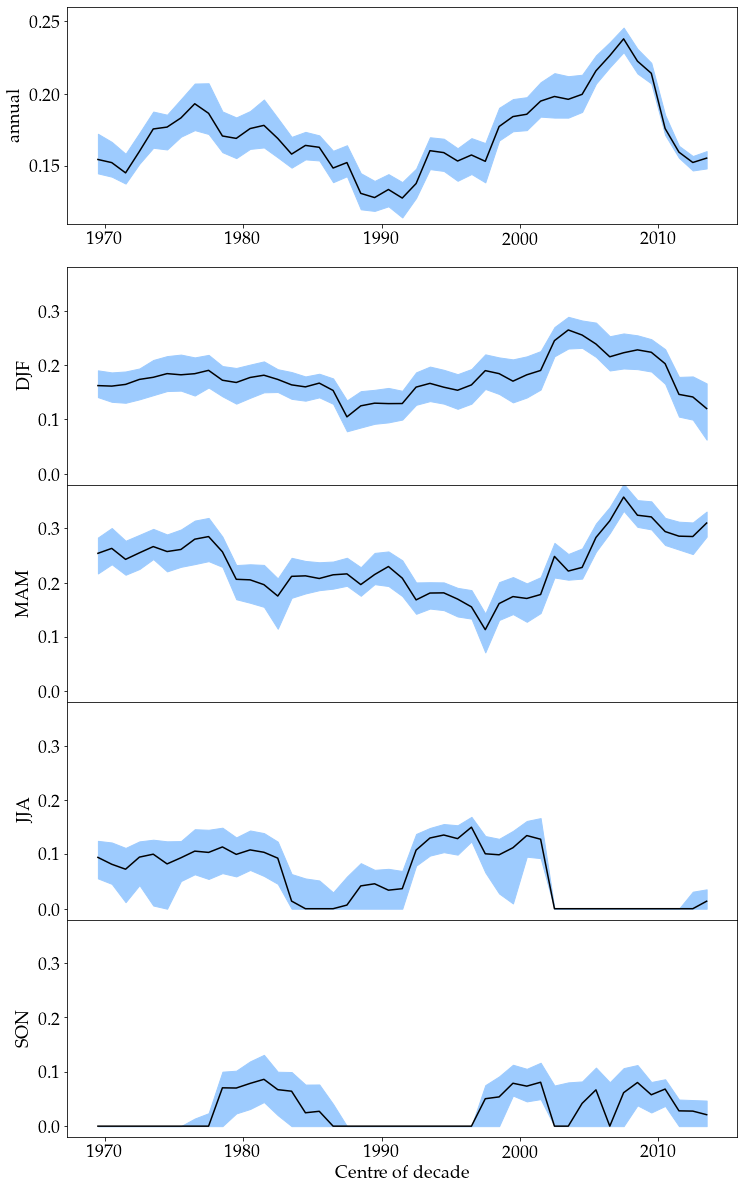

In [99]:
fig,ax = plt.subplots(5,1,figsize=(12,20))
for i,s in enumerate(('annual','DJF','MAM','JJA','SON')):
    if s == 'annual':
        filename = 'fit_files/NINO34_SST__WHOLEPACIFIC_I20_sliding_decade_each_ensemble'
    else:
        filename = 'fit_files/NINO34_SST__WHOLEPACIFIC_I20_10y_'+s
    data = imag_eig(filename)[:,1:]
    years = xr.open_dataset(filename+'_A.nc').start_year
    IQR_timeseries(years+4.5,data,ax=ax[i])
    ax[i].set_ylabel(s)
    ax[i].set_ylim(-0.02,0.38)

plt.xlabel('Centre of decade')
ax[0].set_ylim(0.11,0.26)
fig.subplots_adjust(hspace=0)
box = ax[0].get_position()
box.y0 = box.y0 + 0.03
box.y1 = box.y1 + 0.03
ax[0].set_position(box)
plt.savefig('paperplots/decade_seasonal_imag_samescale_5.pdf')

/Applications/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in reciprocal
  after removing the cwd from sys.path.
/Applications/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in reciprocal
  # Remove the CWD from sys.path while we load stuff.


19.42919805654733 20.055175905749348 20.875733702933122


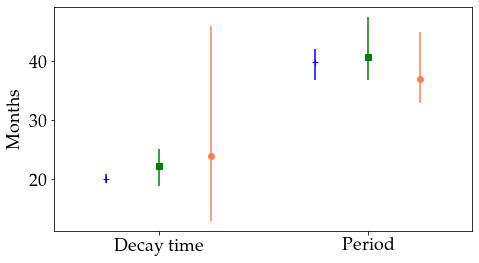

In [100]:
plt.figure(figsize=[7,4])

#Growth
mygrowth = (-np.max(real_eig('fit_files/NINO34_SST__WHOLEPACIFIC_I20')[0],1))**(-1)
growth_med = np.percentile(mygrowth,50)
growth_min = growth_med-np.percentile(mygrowth,25)
growth_max = np.percentile(mygrowth,75)-growth_med
print(growth_med-growth_min,growth_med,growth_med+growth_max)

mygrowthbt = (-np.max(real_eig('fit_files/NINO3_SST__WHOLEPACIFIC_I20_1980_2002')[0],1))**(-1)
growth_medbt = np.percentile(mygrowthbt,50)
growth_minbt = growth_medbt-np.percentile(mygrowthbt,5)
growth_maxbt = np.percentile(mygrowthbt,95)-growth_medbt

plt.errorbar([0],growth_med,[[growth_min],[growth_max]],
            linestyle='None',marker='+',label='CAFEfull',c='b')
plt.errorbar([1],growth_medbt,[[growth_minbt],[growth_maxbt]],
            linestyle='None',marker='s',label='CAFE1980-2002',c='g')
plt.errorbar([2],24,[[11],[22]],
            linestyle='None',marker='o',label='Burgers2005',c='coral')

#Growth
mygrowth = period('fit_files/NINO34_SST__WHOLEPACIFIC_I20')
growth_med = np.percentile(mygrowth,50)
growth_min = growth_med-np.percentile(mygrowth,5)
growth_max = np.percentile(mygrowth,95)-growth_med

mygrowthbt = period('fit_files/NINO34_SST__WHOLEPACIFIC_I20_1980_2002')
growth_medbt = np.percentile(mygrowthbt,50)
growth_minbt = growth_medbt-np.percentile(mygrowthbt,5)
growth_maxbt = np.percentile(mygrowthbt,95)-growth_medbt

plt.errorbar([4],growth_med,[[growth_min],[growth_max]],
            linestyle='None',marker='+',c='b')
plt.errorbar([5],growth_medbt,[[growth_minbt],[growth_maxbt]],
            linestyle='None',marker='s',c='g')
plt.errorbar([6],37,[[4],[8]],
            linestyle='None',marker='o',c='coral')
plt.xticks([1,5],['Decay time','Period'])
plt.ylabel('Months')
plt.xlim(-1,7)
#plt.legend()
plt.tight_layout()
plt.savefig('paperplots/Burgers_comparison.pdf')